In [8]:
import pandas as pd
import glob

files = ["resale-1990-1999.csv",
         "resale-2000-Feb_2012.csv",
         "resale-Mar_2012-Dec_2014.csv",
         "resale-Jan_2015-Dec_2016.csv",
         "resale-Jan_2017_onwards.csv"]

dfs = []

for file in files:
    df1 = pd.read_csv(file,low_memory=False)
    # Ensure same column names: all column headers in lowercase and replace spaces with underscores
    df1.columns = [c.strip().lower().replace(" ", "_") for c in df1.columns]
    dfs.append(df1)

# Merge
df_all = pd.concat(dfs, ignore_index=True)

# Save
df_all.to_csv("hdb_resale.csv", index=False)

print("Columns after merge:", df_all.columns)
print("Combined shape:", df_all.shape)

Columns after merge: Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')
Combined shape: (963149, 11)


In [10]:
# IMPORTS
import pandas as pd

# LOAD DATASET  
df = pd.read_csv("hdb_resale.csv",low_memory=False)
print("Columns:", list(df.columns))
df.info()

# convert to datetime for certain columns 
df['month'] = pd.to_datetime(df['month'],format='%Y-%m')
print(df['month'].dtype)

# check unique values in flat_type 
print(df['flat_type'].unique())
# change MULTI-GENERATION to be consistent with MULTI GENERATION 
df['flat_type'] = df['flat_type'].replace({'MULTI-GENERATION':'MULTI GENERATION'})
print(df['flat_type'].unique())
                            

# Drop rows without critical data and anomalies
df = df.dropna(subset=['resale_price','floor_area_sqm','town','month'])
df = df[(df['resale_price']>1000) & (df['floor_area_sqm']>10)]

# create year + price_psm
df['year'] = df['month'].dt.year
df['price_psm'] = df['resale_price'] / df['floor_area_sqm']

# check data types again
print(df.info())

# save cleaned CSV
df.to_csv("hdb_resale_cleaned.csv", index=False)
print("Saved cleaned CSV:", "hdb_resale_cleaned.csv", "rows:", len(df))


Columns: ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963149 entries, 0 to 963148
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                963149 non-null  object 
 1   town                 963149 non-null  object 
 2   flat_type            963149 non-null  object 
 3   block                963149 non-null  object 
 4   street_name          963149 non-null  object 
 5   storey_range         963149 non-null  object 
 6   floor_area_sqm       963149 non-null  float64
 7   flat_model           963149 non-null  object 
 8   lease_commence_date  963149 non-null  int64  
 9   resale_price         963149 non-null  float64
 10  remaining_lease      254099 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 80

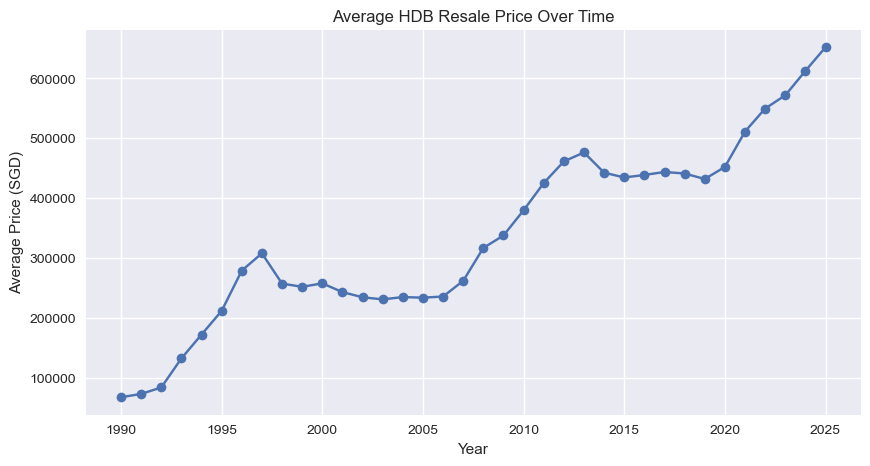

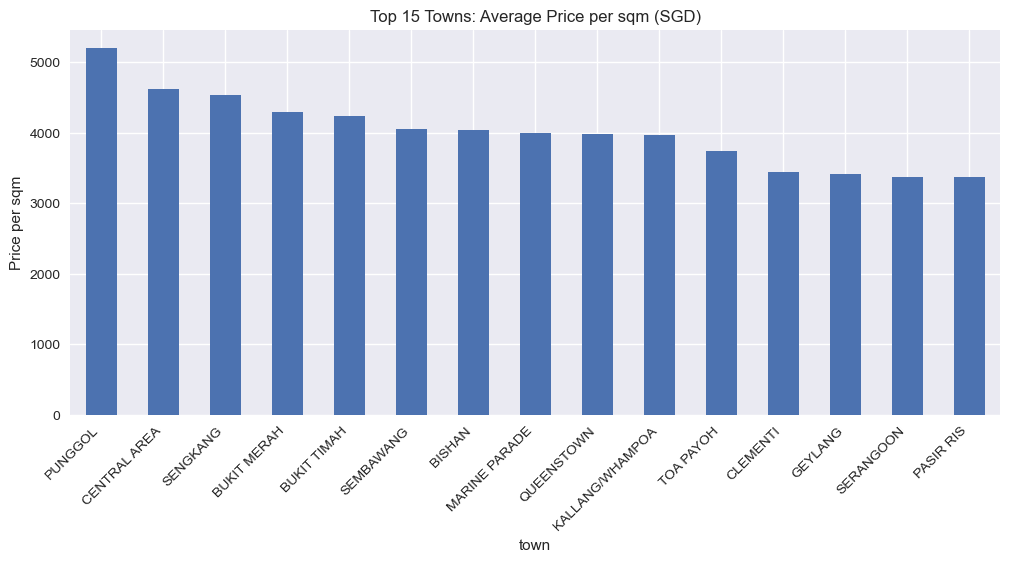

<Figure size 1200x600 with 0 Axes>

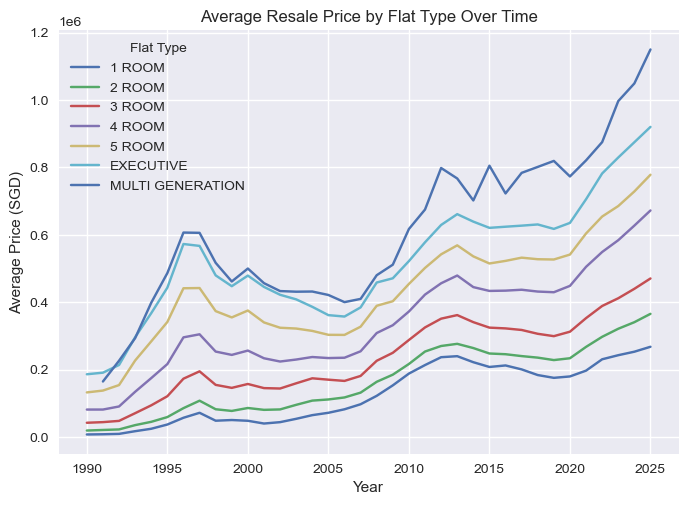

In [11]:
#imports 
import matplotlib.pyplot as plt
import os
plt.style.use("seaborn-v0_8")

# create folders for outputs
os.makedirs("visuals", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)

# PLOT 1: Average price over time 
avg_price_by_year = df.groupby('year')['resale_price'].mean()
plt.figure(figsize=(10,5))
avg_price_by_year.plot(marker='o')
plt.title("Average HDB Resale Price Over Time")
plt.xlabel("Year"); plt.ylabel("Average Price (SGD)")
plt.grid(True)
plt.savefig("visuals/avg_price_by_year.png", bbox_inches='tight')
plt.show()

# PLOT 2: Top 15 towns by price per sqm 
avg_psm_town = df.groupby('town')['price_psm'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,5))
avg_psm_town.plot(kind='bar')
plt.title("Top 15 Towns: Average Price per sqm (SGD)")
plt.ylabel("Price per sqm")
plt.xticks(rotation=45, ha='right')
plt.savefig("visuals/psm_by_town.png", bbox_inches='tight')
plt.show()

# PLOT 3: Flat type trends over time
flat_trend = df.groupby(['year','flat_type'])['resale_price'].mean().unstack()
plt.figure(figsize=(12,6))
flat_trend.plot()
plt.title("Average Resale Price by Flat Type Over Time")
plt.xlabel("Year"); plt.ylabel("Average Price (SGD)")
plt.legend(title="Flat Type")
plt.savefig("visuals/flat_trend.png", bbox_inches='tight')
plt.show()


